Using data from Stack Overflow Developer Survey 2022<br>
https://insights.stackoverflow.com/survey


In [119]:
# to handle datasets
import numpy as np
import pandas as pd

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Stackoverflow survey data
df2022 = pd.read_csv('data1/survey_results_public.csv')
df2022_no_null = df2022
df2022_no_null.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [121]:
# These are the columns that I care about
columns_to_display = ['YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Age', 'Gender','Ethnicity','EdLevel']
selected_df = df2022_no_null[columns_to_display]

# I only want ['Country'] == 'Thailand'
thailand_df = selected_df[selected_df['Country'] == 'Thailand']
thailand_df.head(3)

,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,Age,Gender,Ethnicity,EdLevel
358,3,"Developer, mobile","1,000 to 4,999 employees",Thailand,THB\tThai baht,1568000.0,Yearly,C#;Dart;Go;JavaScript;Swift;TypeScript,MongoDB;MySQL;Firebase Realtime Database;SQLite,AWS;DigitalOcean;Firebase;Heroku,ASP.NET Core ;Express;Node.js,Docker;Homebrew;npm,25-34 years old,Man,Asian;Southeast Asian,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
695,1,"Developer, back-end;Blockchain","1,000 to 4,999 employees",Thailand,THB\tThai baht,50000.0,Monthly,JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,AWS,Express;Node.js,Docker;Homebrew;npm,18-24 years old,Man,Southeast Asian,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
816,5,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,Thailand,THB\tThai baht,32000.0,Monthly,C#;Go;HTML/CSS;Java;JavaScript;Kotlin;PHP;Pyth...,MariaDB;MongoDB;MySQL;PostgreSQL;Redis;SQLite,AWS;DigitalOcean;Heroku,ASP.NET;ASP.NET Core ;Django;Express;Node.js;V...,Docker;Homebrew;Kubernetes;npm;Unreal Engine,25-34 years old,Man,Asian;Southeast Asian,Some college/university study without earning ...


In [130]:
totalRows = df2022_no_null.shape
totalRows_thailand = thailand_df.shape[0] # (175, 16)
totalRows_thailand # this the total number of people who answered the survey in Thailand
print(f'There are {totalRows_thailand} people who answered the survey in Thailand \nout of {totalRows[0]} people who answered the survey in 2022')

There are 175 people who answered the survey in Thailand 
out of 73268 people who answered the survey in 2022


Part 1

Question 1
What is the required programming language use most in Thailand?

Question 2
What is the required web framework use most in Thailand?

Question 3
What is the required database use most in Thailand?

Question 4
What are the required tools and technologies use most in Thailand?


Using these columns from the 'Dataframe'
- DatabaseHaveWorkedWith
- PlatformHaveWorkedWith
- WebframeHaveWorkedWith
- ToolsTechHaveWorkedWith

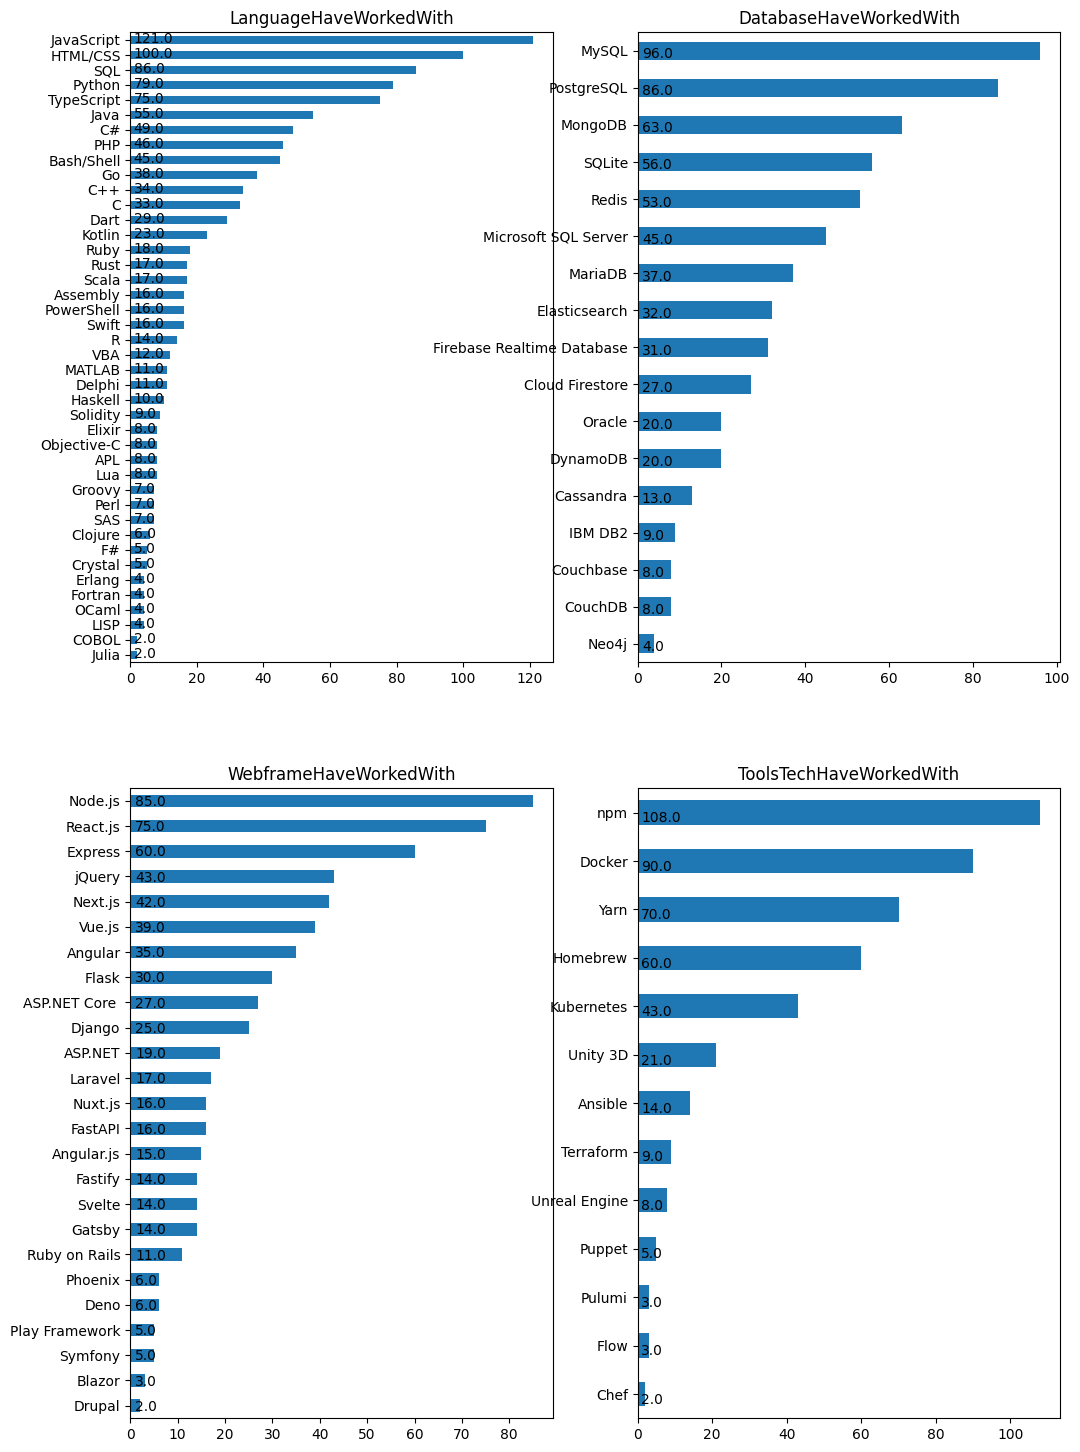

In [123]:
############################################
# Custom functions
############################################

def makeGraph(data1, xtitle, ytitle, graphTitle):
    plt.figure(figsize=(12,13))
    plt.title(graphTitle)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    # plt.barh(x,y)
    plt.barh(data1.index, data1.values)

      # Add the numeric values to the bars
    for i, v in enumerate(data1.values):
        # plt.text(x,y, text, color, fontsize)
        plt.text(1, i-0.2, str(v), color='black', fontsize=10)

    plt.show()


def splitAndSum(df, colName):  
  """
    Split a strings that are seperated by ';'

    input: dataframe, column name
    output: dataframe
  """

  dfSplit = df[colName].str.split(';', expand=True)
  dfCount = dfSplit.apply(pd.Series.value_counts).sum(axis=1) # 'apply' function to all rows
  dfCount = dfCount.sort_values(ascending=True) # default is 'sort ascending'
  
  # dfCount.drop('xxx', inplace=True) # drop the 'xxx' value
  # lanCount.index    
  return dfCount


def addValueToBar(subplotLocation, data1):
  """
    # Add the numeric values to the bars

    input: location (int), dataframe
    output: nothing
  """

  for i, v in enumerate(data1.values):    
    
    # text(x,y, text, color, fontsize)
    subplotLocation.text(1, i-0.2, str(v), color='black', fontsize=10)
    # ax[0,0].text(1, i-0.3, str(v), color='black', fontsize=10)



colName = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith', 
           'ToolsTechHaveWorkedWith', ]

# Create a figure with a 2x2 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 18))

lanCount = splitAndSum(thailand_df, colName[0])
databaseCount = splitAndSum(thailand_df, colName[1])
webframeCount = splitAndSum(thailand_df, colName[2])
toolsCount = splitAndSum(thailand_df, colName[3])

lanCount.plot.barh(ax=ax[0,0], title=colName[0])
databaseCount.plot.barh(ax=ax[0,1], title=colName[1])
webframeCount.plot.barh(ax=ax[1,0], title=colName[2])
toolsCount.plot.barh(ax=ax[1,1], title=colName[3])

addValueToBar(ax[0,0], lanCount)
addValueToBar(ax[0,1], databaseCount)
addValueToBar(ax[1,0], webframeCount)
addValueToBar(ax[1,1], toolsCount)

# Show the plot
plt.show()


Part 2, I asked 5 questions:

Question 5
How many years of coding experience do developers have in Thailand?

Question 6
What type of developments do developers do in Thailand?

Question 7
what is the size of the company that developers work in Thailand?

Question 8
what is the salary of developers in Thailand?

Question 9
How often do developers get paid in Thailand?

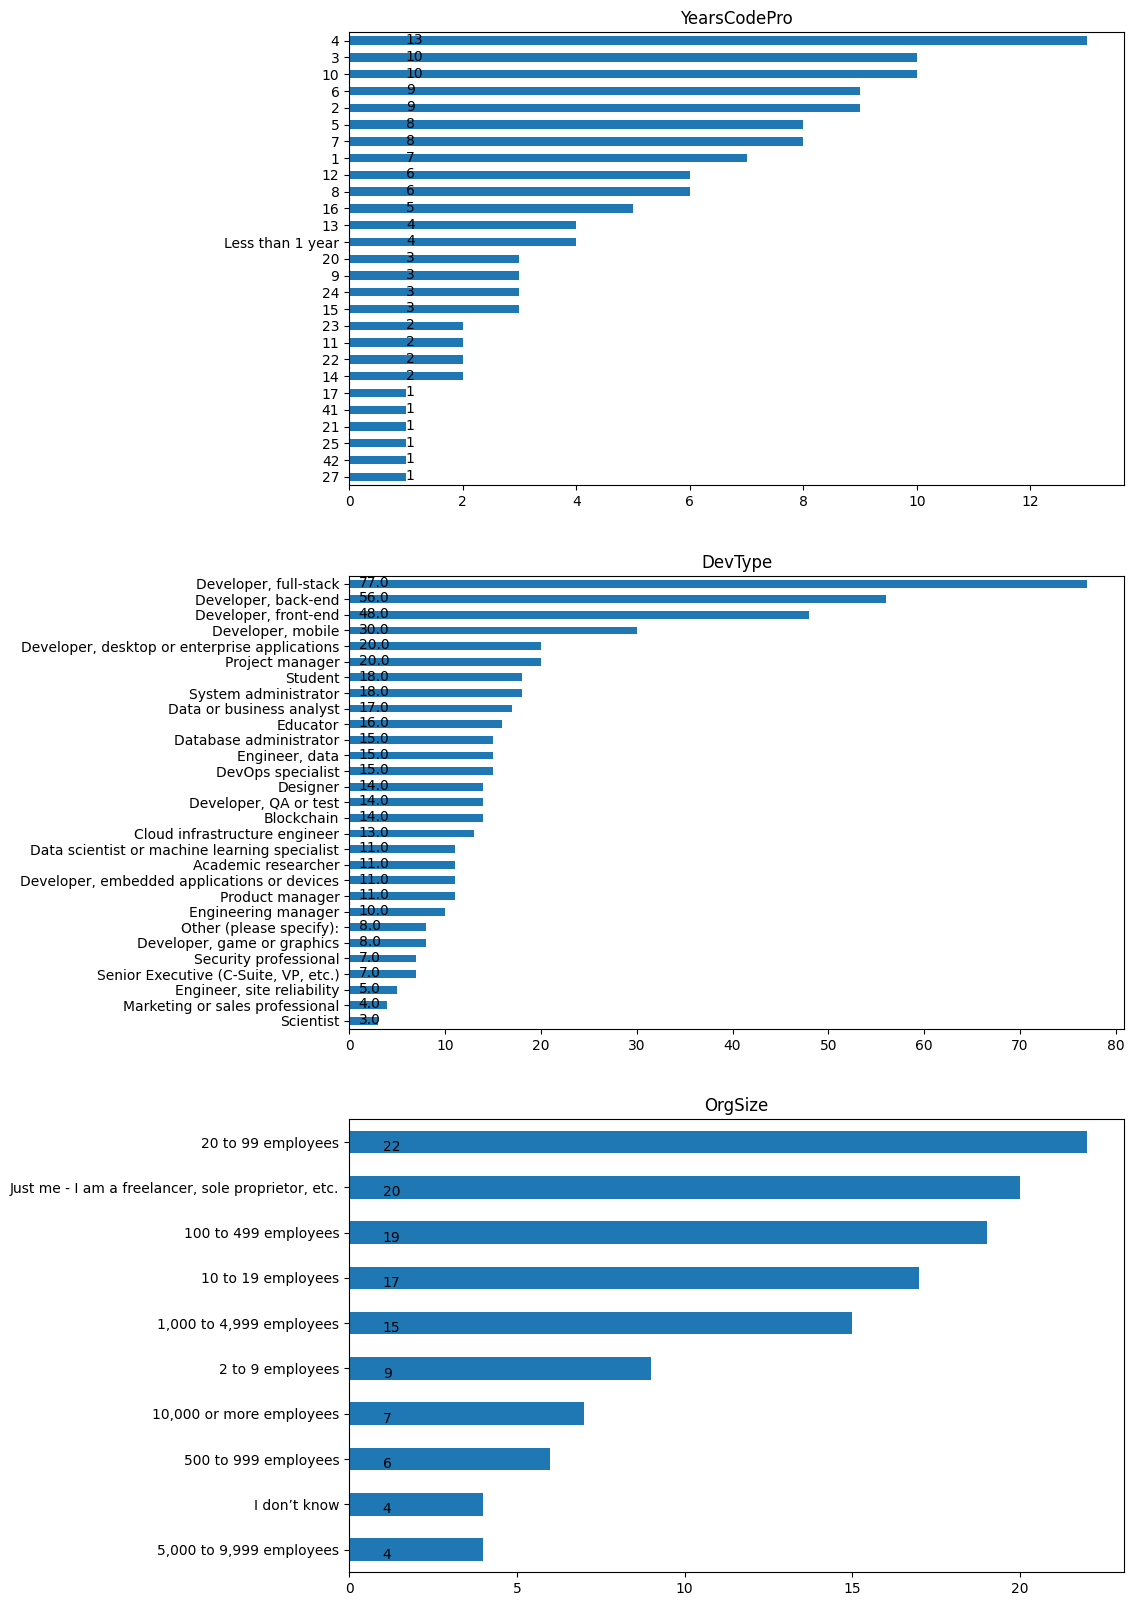

In [124]:
# Section 2

# Create a figure with a 2x2 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

sec2 = ["YearsCodePro", "DevType", "OrgSize"]

for index in range(0, len(sec2) ):
  data1 = splitAndSum(thailand_df, sec2[index])
  data1.plot.barh(ax=ax[index], title=sec2[index])
  addValueToBar(ax[index], data1)

Index(['Weekly', 'Yearly', 'Monthly'], dtype='object')
[ 1 22 80]


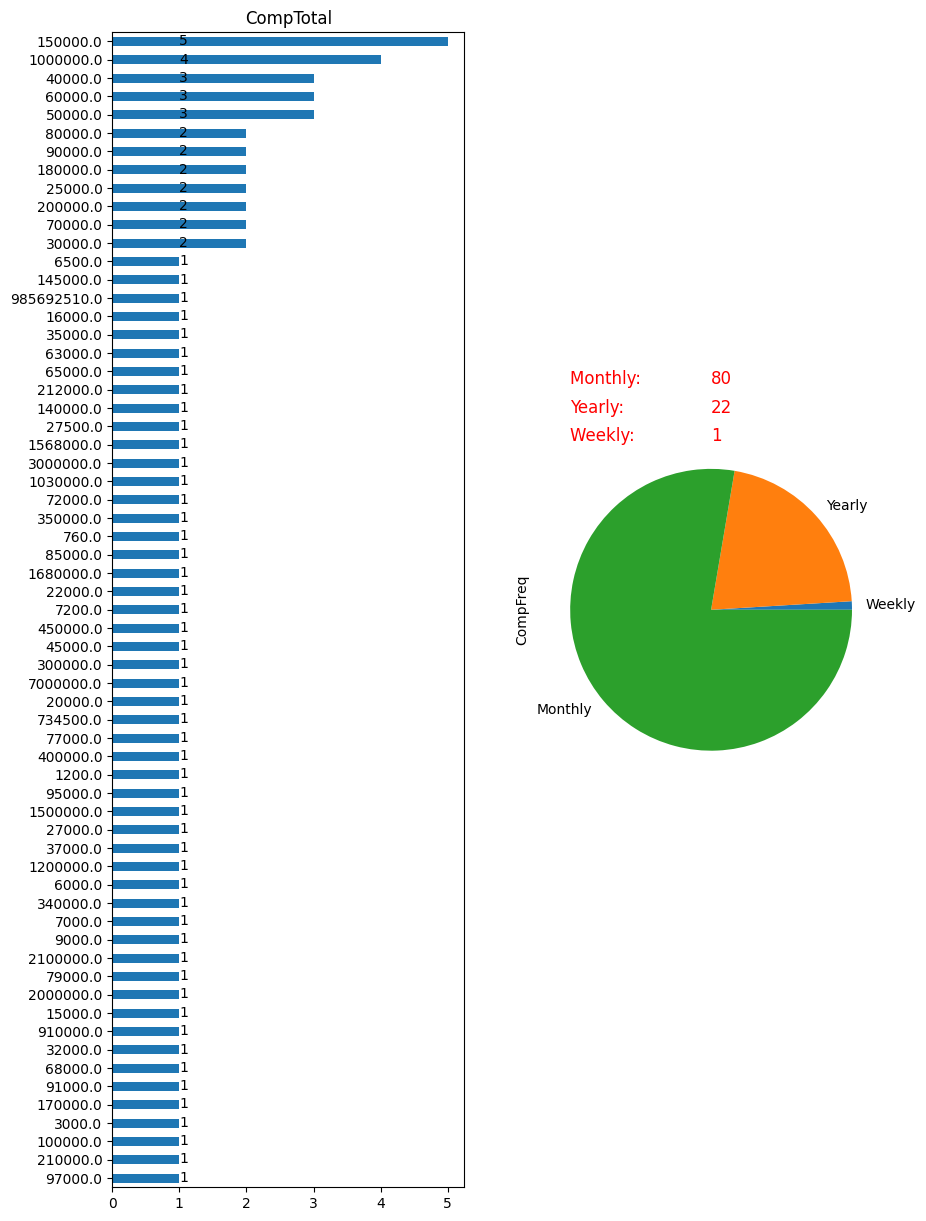

In [125]:
sec3 = ["CompTotal", "CompFreq"]

compCount = thailand_df['CompTotal'].value_counts().sort_values(ascending=True)
freqCount = thailand_df['CompFreq'].value_counts().sort_values(ascending=True)
print(freqCount.index)
print(freqCount.values)

fig, subplot1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))

compCount.plot.barh(ax=subplot1[0], title=sec3[0]) # row 1 column 0
addValueToBar(subplot1[0], compCount)

freqCount.plot.pie(ax=subplot1[1]) # row 1 column 1
# subplot1[1].text(0, 1.5, freqCount, fontsize=12, color='red')

num1 = 0
index=0
for asdf in freqCount.index:
    subplot1[1].text(-1, 1.2+num1, f'{asdf}: ', fontsize=12, color='red')
    subplot1[1].text(0, 1.2+num1, freqCount.values[index], fontsize=12, color='red')
    num1 += 0.2
    index += 1